In [ ]:
# Run the tutorial in source directory and keep data in data directory 
# the  cell 1 after this cell  contain neccessary function to generate results
# main code start after this  

In [1]:
import numpy as np
from fista import  *
from power_method import  *
from wiggle_plot import  *

In [2]:
import os
from scipy.io import savemat,loadmat
import matplotlib.pyplot as plt 
directory = '../data/Synthetic_multichannel_Naveen'
filename = os.path.join(directory)
d= loadmat(filename)
data= d['d']
data_noisy=d['d_noisy']
w=d['w'] # input wavelet 
r=d['r']


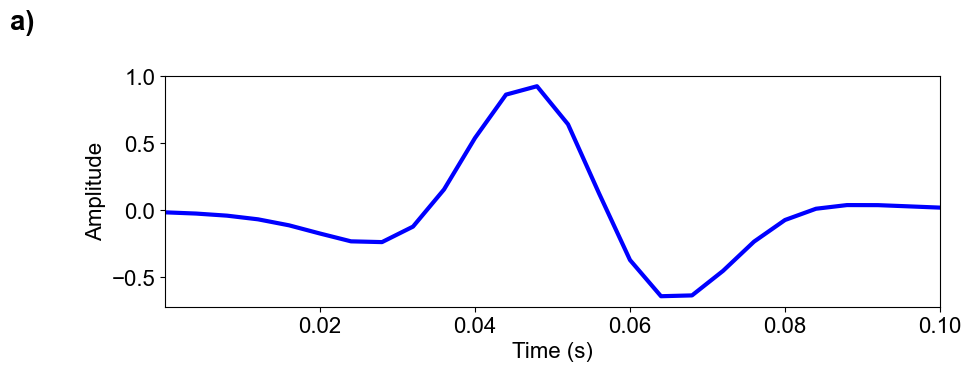

In [3]:
w=w.reshape((27,))
time_wav=np.arange(0, 0.004 * len(w), 0.004)
plt.rcParams["font.family"] = "Arial"
plt.rcParams['axes.labelsize'] = 16
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

# Create wavelet and the reflectivity series

fig, ax = plt.subplot_mosaic(
    [
        ["A", "A"]
    ],
    figsize = (10, 3)
)
ax["A"].plot(time_wav,w, color="blue", linewidth=3)
ax["A"].set_xlabel("Time (s)")
ax["A"].set_ylabel("Amplitude")
ax["A"].text(-.2, 1.2, s="a)", transform=ax["A"].transAxes, fontsize="20", fontweight='bold')
ax["A"].set_xlim((0, 0.1))
ax["A"].set_xticks(np.arange(0.02, 0.101, step=0.02))
plt.show() 

In [4]:
data.shape
w.shape
w=w.reshape((27,))

In [5]:
p=data.shape[0]
l_d=data.shape[0]
l_d
print(l_d)
n_samples = data.shape[0]
time = np.linspace(0, 1, n_samples)

180


# Data_noise_free & Data_noisy

In [24]:
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), dpi=600)

# Plot noise-free data on the first subplot
wiggle_plot(data[int(.2//0.4):l_d-int(.2//0.4)-1, :], 
            time=None, trace_offset=1, fill_color="k", linewidth=1.5, 
            ax=axes[0], xlabel="Trace Number", ylabel="Time", title=None, label="a)")

# Plot noisy data on the second subplot
wiggle_plot(data_noisy[int(.2//0.4):l_d-int(.2//0.4)-1, :], 
            time=None, trace_offset=1, fill_color="k", linewidth=1.5, 
            ax=axes[1], xlabel="Trace Number", ylabel="Time", title=None, label="b)")

# Adjust layout
plt.tight_layout()


In [7]:
import numpy as np
def toepn(p,wo):
    """
    input
    p=length of data vector
    wo= initial wavelet vector
    output
    A=toeplitz matrix of  sorce wavelet
    """
    q=len(wo)
    col=np.hstack((wo,np.zeros(p-q)))  #first column and first row of toeplitz matr
    row=np.hstack((wo[0],np.zeros(p-1)))
    from scipy.linalg import toeplitz
    A=toeplitz(col,row)
    return(A)
A=toepn(l_d,w)
A.shape

(180, 180)

In [8]:
dim=A.shape[1]
x0=np.zeros(dim)
xo=np.random.normal(0,1,(dim,1))
alpha=power_method(A, xo, max_iter=50)
my_lambda=0.01
xo.shape

(180, 1)

In [9]:
xfinal=np.zeros((dim,24))
d=np.zeros_like(data)
xfinal.shape
# d.shape

(180, 24)

# Fista

In [20]:
m_sol_fista=0*data  
m_sol_fista_n=0*data_noisy
for i in range(24):
    d=data[:,i]
    d_n=data_noisy[:,i]
    x_sol,itr=fista(A, d, 0.5, alpha, 1000)
    x_sol_n,itr=fista( A,d_n, 0.5, alpha, 1000)
    m_sol_fista[:,i]=x_sol
    m_sol_fista_n[:,i]=x_sol_n


In [21]:
padding = np.zeros((13, 24))  
m_sol_fista= np.vstack([padding, m_sol_fista])
m_sol_fista.shape

m_sol_fista_n= np.vstack([padding, m_sol_fista_n])
m_sol_fista_n.shape

(193, 24)

In [25]:
r=r[int(.2//0.4):l_d-int(.2//0.4)-1,:]
m_sol_fista=m_sol_fista[:-13]
m_sol_fista_n=m_sol_fista_n[:-13]
save_dir = '../results/decon_2d/'
os.makedirs(save_dir, exist_ok=True)
savemat('../results/decon_2d/True_Refelctivity.mat', { "reflectivity_true":r})
savemat('../results/decon_2d/Recovered_reflectivity_noisyfree.mat', { "m_sol_fista"     : m_sol_fista})
savemat('../results/decon_2d/Recovered_reflectivity_noisy.mat', { "m_sol_fista_noisy":m_sol_fista_n})

# Recovered and True Reflectivity

In [23]:
import matplotlib.pyplot as plt

# Create figure with three subplots
# Plot True reflectivity datafrom  on the first subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 8), dpi=600)
wiggle_plot(r[int(.2//0.4):l_d-int(.2//0.4)-1,:], 
            time=None, trace_offset=1, fill_color="k", linewidth=1.5, 
            ax=axes[0], xlabel="Trace Number", ylabel="Time", title=None, label="a)")
# Plot recovered reflectivity noise-free data on the first subplot
wiggle_plot(m_sol_fista[:-13], 
            time=None, trace_offset=1, fill_color="k", linewidth=1.5, 
            ax=axes[1], xlabel="Trace Number", ylabel="Time", title=None, label="b)")

# Plot recovered reflectivity noisy data on the first subplot
wiggle_plot(m_sol_fista_n[:-13], 
            time=None, trace_offset=1, fill_color="k", linewidth=1.5, 
            ax=axes[2], xlabel="Trace Number", ylabel="Time", title=None, label="c)")

# Adjust layout
plt.tight_layout()
# Define the directory path
save_dir = '../results/decon_2d/'

# Create the directory if it does not exist
os.makedirs(save_dir, exist_ok=True)

# Define the full file path
dirt = os.path.join(save_dir, 'Reflectivity_2d_synthetic.pdf')

# Save high-quality grayscale image
plt.savefig(dirt, dpi=600, bbox_inches='tight')
plt.show()
